In [7]:
 #Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os 
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [32]:
# Setting URL for the API call
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build query URL
query_url = url + "appid=" + api_key + "&q=" 

##  Quick Ref regarding exercise parameters here:
#  Your objective is to build a series of scatter plots to showcase the following relationships:
#     Temperature (F) vs. Latitude
#     Humidity (%) vs. Latitude
#     Cloudiness (%) vs. Latitude
#     Wind Speed (mph) vs. Latitude

#  Creating empty lists to hold our retrieved data from the API.  Also including lists for data,
#  latitude, longitude, and country based on example provided.

#setting up lists to contain data
new_cities =[]
country = []
clouds = []
date= []
humidity = []
temps = []
lats = []
lngs = []
wind = []

#  Utilize a For Loop with the new 'try' and 'except' method / parameter Hobert mentioned last class
#  Exercise specified to provide a log of each city and it's retrieval number, need to implement 
#  a counter as part of the For loop below.

#record/set counters set to 0
record_counter = 0
set_counter = 0

#  Make the log file user friendly with descriptive statements
print(f"Please wait, Data Retrieval Initiated!")
print(f"=======================================")

#  Our loop begins.  Exercise utilized the random function from the Numpy module to select random 
#  latitudes & longitudes, and then utilized Citipy's nearest city function to build our city list.
#  So now we'll loop through our new randomized city list to pull data from the OpenWeather API.

for city in cities: 
    
    #if statement for counters - if record goes over 49, set adds 1
    if record_counter <49:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    #print in style of starter code    
    
    
    try: 
        
        # Primary Data Retrieval
        #response = requests.get(f"{url}&q={city}").json() 
        response = requests.get(f"{query_url}{city}").json()
                
        # add to city
        new_cities.append(response["name"])
        # add to cloudiness
        clouds.append(response["clouds"]["all"])
        # add to country
        country.append(response["sys"]["country"])
        # add to date
        date.append(response["dt"])
        # add to humidity
        humidity.append(response["main"]["humidity"])
        # add to max temp
        temps.append(response["main"]["temp_max"])
        # add to latitude
        lats.append(response["coord"]["lat"])
        # add to longitude
        lngs.append(response["coord"]["lon"])
        # add to windspeed
        wind.append(response["wind"]["speed"])
        
        print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    
        # using this sleep method to avoid pulling more than 60 queries a minute (I inlcluded
        # a extra half-second as margin of error)
        #time.sleep(1.5)
        
    # If no record found "skip" to next call
    except:
        print(f'City NOT found. Skipping....\n')
    continue
    
#print in format of starter code  
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')


Please wait, Data Retrieval Initiated!
Processing record 1 of set 0 | half moon bay
Processing record 2 of set 0 | ranau
Processing record 3 of set 0 | grand forks
Processing record 4 of set 0 | northam
Processing record 5 of set 0 | rikitea
City NOT found. Skipping....

Processing record 7 of set 0 | ushuaia
Processing record 8 of set 0 | busselton
Processing record 9 of set 0 | jamestown
Processing record 10 of set 0 | ercis
Processing record 11 of set 0 | bethel
Processing record 12 of set 0 | kapaa
Processing record 13 of set 0 | hithadhoo
Processing record 14 of set 0 | dolores
Processing record 15 of set 0 | albany
Processing record 16 of set 0 | boguchany
Processing record 17 of set 0 | palauig
Processing record 18 of set 0 | lebu
Processing record 19 of set 0 | dikson
Processing record 20 of set 0 | huanren
Processing record 21 of set 0 | ilulissat
Processing record 22 of set 0 | motca
Processing record 23 of set 0 | chokurdakh
Processing record 24 of set 0 | araouane
Processin

Processing record 2 of set 4 | chipinge
Processing record 3 of set 4 | college
Processing record 4 of set 4 | bhainsa
City NOT found. Skipping....

Processing record 6 of set 4 | eureka
Processing record 7 of set 4 | yuncheng
Processing record 8 of set 4 | taoudenni
Processing record 9 of set 4 | ostrovnoy
Processing record 10 of set 4 | soyo
City NOT found. Skipping....

Processing record 12 of set 4 | biu
Processing record 13 of set 4 | sobolevo
Processing record 14 of set 4 | camana
Processing record 15 of set 4 | urla
Processing record 16 of set 4 | san juan
Processing record 17 of set 4 | vila velha
Processing record 18 of set 4 | iracoubo
Processing record 19 of set 4 | esperance
Processing record 20 of set 4 | sitka
Processing record 21 of set 4 | irgakly
Processing record 22 of set 4 | slave lake
Processing record 23 of set 4 | ormara
Processing record 24 of set 4 | salalah
Processing record 25 of set 4 | barrow
Processing record 26 of set 4 | kriel
Processing record 27 of set 

Processing record 7 of set 8 | maxixe
Processing record 8 of set 8 | sinop
Processing record 9 of set 8 | dalvik
Processing record 10 of set 8 | omboue
Processing record 11 of set 8 | esil
Processing record 12 of set 8 | sola
Processing record 13 of set 8 | teknaf
Processing record 14 of set 8 | bud
Processing record 15 of set 8 | asfi
Processing record 16 of set 8 | tezu
Processing record 17 of set 8 | alekseyevka
Processing record 18 of set 8 | whitianga
Processing record 19 of set 8 | doha
Processing record 20 of set 8 | tofield
Processing record 21 of set 8 | panama city
Processing record 22 of set 8 | blackwater
Processing record 23 of set 8 | mosalsk
Processing record 24 of set 8 | xiazhen
Processing record 25 of set 8 | katherine
Processing record 26 of set 8 | kasongo
Processing record 27 of set 8 | biskamzha
Processing record 28 of set 8 | port-gentil
Processing record 29 of set 8 | sao sepe
Processing record 30 of set 8 | vaitape
Processing record 31 of set 8 | porto nacional

Processing record 9 of set 12 | nevers
Processing record 10 of set 12 | yuzawa
Processing record 11 of set 12 | vadso
Processing record 12 of set 12 | tecoanapa
Processing record 13 of set 12 | srednebelaya
Processing record 14 of set 12 | anloga
Processing record 15 of set 12 | jiutai
City NOT found. Skipping....

Processing record 17 of set 12 | chengzihe
Processing record 18 of set 12 | deer lake
City NOT found. Skipping....

Processing record 20 of set 12 | ust-omchug
Processing record 21 of set 12 | saint anthony
Processing record 22 of set 12 | santo antonio do ica
Processing record 23 of set 12 | birao
Processing record 24 of set 12 | makakilo city
Processing record 25 of set 12 | padampur
Processing record 26 of set 12 | homer
Processing record 27 of set 12 | dobryanka
Processing record 28 of set 12 | vuktyl
Processing record 29 of set 12 | dzerzhinsk
Processing record 30 of set 12 | kaberamaido
Processing record 31 of set 12 | guangshui
Processing record 32 of set 12 | japura


In [78]:
#converting lists above into a dictionary 

weather_dict = {"City": new_cities,
                "Country": country,
                "Date": date,
                "Max Temp": temps,
                "Humidity (%)": humidity,
                "Cloudiness (%)": clouds,
                "Lat": lats,
                "Lng": lngs,
                "Wind Speed": wind,                             
}

weather_df = pd.DataFrame(weather_dict)
#weather_df.count()

#output file for data
output_file = os.path.join("output_data/city_weather_data.csv")
#open output file
with open(output_file, 'w') as datafile:
    weather_df.to_csv(output_file)

In [79]:
#test to see if there are cities with over 100% humidity anywhere in dataset
weather_df.head(20)

#  Get the indices of cities that have humidity over 100%.
max_humidity_cities = weather_df.loc[weather_df["Humidity (%)"]>100, :].index
max_humidity_cities

#NO cities with great than 100 % humidity


Int64Index([], dtype='int64')

Analysis: The closer the latitude is to zero, the higher the temperature of the city. The Northern Hemisphere is currently experiencing the coldest temperatures because the current season in the Northern Hemisphere is Winter


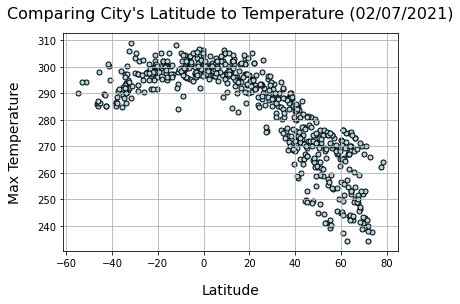

In [82]:
## Latitude vs. Temperature Plot

#establish x and y values
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]

#create scatter plot
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)


#x y and title labels
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Max Temperature", labelpad=15, fontsize=14)
plt.title("Comparing City's Latitude to Temperature (02/07/2021)", pad=15, fontsize=16)

#formatting
plt.grid()

#print analysis
print("Analysis: The closer the latitude is to zero, the higher the temperature of the city. The Northern Hemisphere is currently experiencing the coldest temperatures because the current season in the Northern Hemisphere is Winter")

#save figures as pngs
plt.savefig("Images/lat_temp_plot.png")

Analysis: Higher humidity percentages are more likely in the northern hemisphere(latitude over zero)


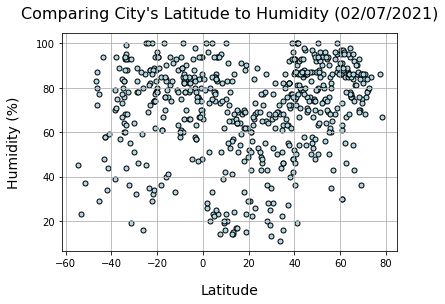

In [83]:
## Latitude vs. Humidity Plot

#establish x and y values
x_values = weather_df["Lat"]
y_values = weather_df["Humidity (%)"]

#create scatter plot
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#x y and title labels
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Humidity (%)", labelpad=15, fontsize=14)
plt.title("Comparing City's Latitude to Humidity (02/07/2021)", pad=15, fontsize=16)

#formatting
plt.grid()

#print analysis
print("Analysis: Higher humidity percentages are more likely in the northern hemisphere(latitude over zero)")

#save figures as pngs
plt.savefig("Images/lat_humidity_plot.png")

Analysis: Cloudiness varies drastically from day to day, so it is not surprising that there is no true correlation of the data points. If I had to make an inference, looking at the Northern hemisphere, the closer the city is to the equator, the more likely it is to be clear.


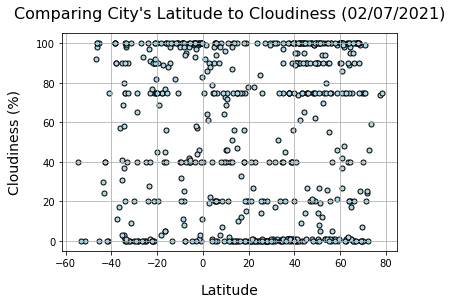

In [84]:
## Latitude vs. Cloudiness Plot

#establish x and y values
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness (%)"]

#create scatter plot
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#x y and title labels
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Cloudiness (%)", labelpad=15, fontsize=14)
plt.title("Comparing City's Latitude to Cloudiness (02/07/2021)", pad=15, fontsize=16)

#formatting
plt.grid()

#print analysis
print("Analysis: Cloudiness varies drastically from day to day, so it is not surprising that there is no true correlation of the data points. If I had to make an inference, looking at the Northern hemisphere, the closer the city is to the equator, the more likely it is to be clear.")

#save figures as pngs
plt.savefig("Images/lat_cloudiness_plot.png")

Analysis: The higher wind speeds tend to occur at latitudes farthest away from the equator.


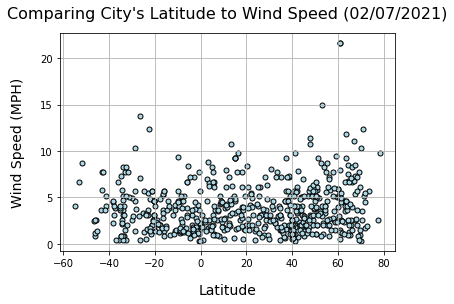

In [96]:
## Latitude vs. Wind Speed Plot

#establish x and y values
x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]

#create scatter plot
fig1, ax1 = plt.subplots()
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#x y and title labels
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Wind Speed (MPH)", labelpad=15, fontsize=14)
plt.title("Comparing City's Latitude to Wind Speed (02/07/2021)", pad=15, fontsize=16)

#formatting
plt.grid()

#print analysis
print("Analysis: The higher wind speeds tend to occur at latitudes farthest away from the equator.")

#save figures as pngs
plt.savefig("Images/lat_wind_speed_plot.png")

In [86]:
#Linear Regression

#create north hem data with lat equal to and over zero
north_hem = weather_df[weather_df["Lat"]>= 0]

#create south hem with lat less than zero

south_hem = weather_df[weather_df["Lat"]< 0]

south_hem.head(15)

,City,Country,Date,Max Temp,Humidity (%),Cloudiness (%),Lat,Lng,Wind Speed
4,Rikitea,PF,1612725358,298.33,72,91,-23.1203,-134.9692,5.50
5,Ushuaia,AR,1612725732,290.15,45,40,-54.8000,-68.3000,4.12
6,Busselton,AU,1612725527,290.37,99,98,-33.6500,115.3333,0.89
11,Hithadhoo,MV,1612725765,300.94,70,83,-0.6000,73.0833,3.66
12,Dolores,AR,1612725765,298.40,57,57,-36.3132,-57.6792,6.62
16,Lebu,CL,1612725765,290.77,75,11,-37.6167,-73.6500,3.87
26,Namatanai,PG,1612725766,299.90,80,100,-3.6667,152.4333,2.07
27,Saint-Pierre,RE,1612725622,300.15,74,90,-21.3393,55.4781,2.06
28,Tanete,ID,1612725766,297.40,88,99,-3.9443,119.7848,1.20
32,Cape Town,ZA,1612725440,293.71,68,0,-33.9258,18.4232,8.23


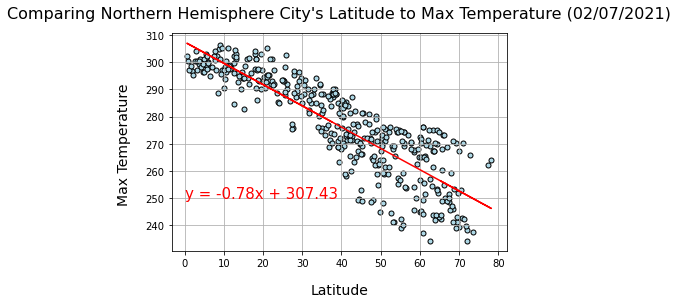

In [87]:
#linear regression = Northern Hemisphere - Max Temp vs. Latitude 

#x and y values 
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]

#linear regression formula/equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values,y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#labeling and formatting
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Max Temperature ", labelpad=15, fontsize=14)
plt.title("Comparing Northern Hemisphere City's Latitude to Max Temperature (02/07/2021)", pad=15, fontsize=16)
plt.grid()

#plot linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,250),fontsize=15,color="red")
plt.show

#save figure
plt.savefig("Images/north_hem_lat_temp_lin_regress_scatter_plot.png")


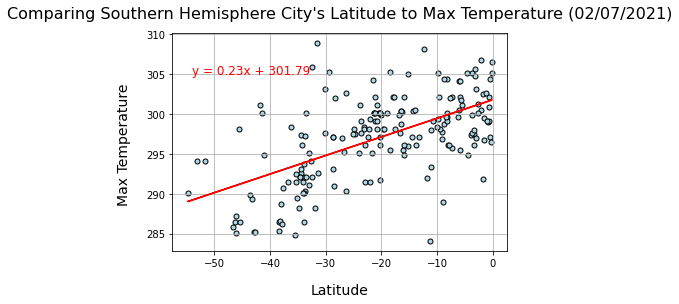

In [88]:
#linear regression = Southern Hemisphere - Max Temp vs. Latitude 

#x and y values 
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]

#linear regression formula/equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values,y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#labeling and formatting
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Max Temperature ", labelpad=15, fontsize=14)
plt.title("Comparing Southern Hemisphere City's Latitude to Max Temperature (02/07/2021)", pad=15, fontsize=16)
plt.grid()

#plot linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,305),fontsize=12,color="red")
plt.show

#save figure
plt.savefig("Images/south_hem_lat_temp_lin_regress_scatter_plot.png")

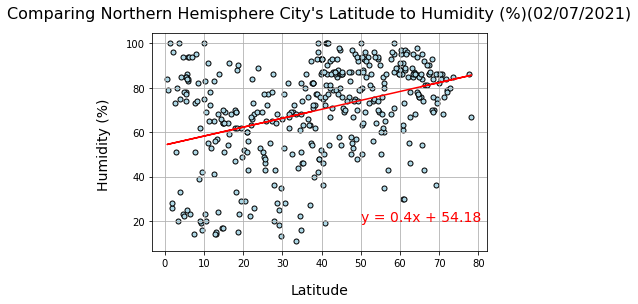

In [89]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶


#x and y values 
x_values = north_hem["Lat"]
y_values = north_hem["Humidity (%)"]

#linear regression formula/equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values,y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#labeling and formatting
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Humidity (%) ", labelpad=15, fontsize=14)
plt.title("Comparing Northern Hemisphere City's Latitude to Humidity (%)(02/07/2021)", pad=15, fontsize=16)
plt.grid()

#plot linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=14,color="red")
plt.show

#save figure
plt.savefig("Images/north_hem_lat_humidity_lin_regress_scatter_plot.png")

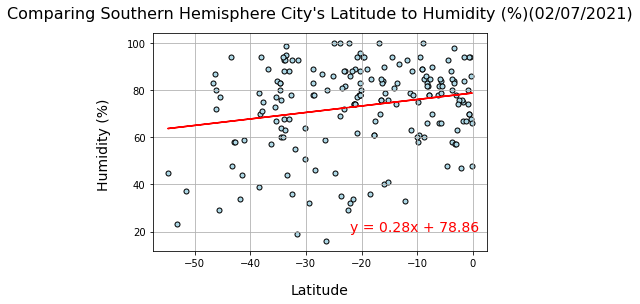

In [90]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶


#x and y values 
x_values = south_hem["Lat"]
y_values = south_hem["Humidity (%)"]

#linear regression formula/equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values,y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#labeling and formatting
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Humidity (%) ", labelpad=15, fontsize=14)
plt.title("Comparing Southern Hemisphere City's Latitude to Humidity (%)(02/07/2021)", pad=15, fontsize=16)
plt.grid()

#plot linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,20),fontsize=14,color="red")
plt.show

#save figure
plt.savefig("Images/south_hem_lat_humidity_lin_regress_scatter_plot.png")

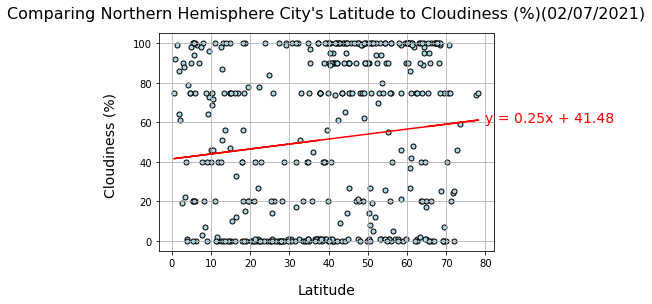

In [91]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶


#x and y values 
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness (%)"]

#linear regression formula/equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values,y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#labeling and formatting
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Cloudiness (%) ", labelpad=15, fontsize=14)
plt.title("Comparing Northern Hemisphere City's Latitude to Cloudiness (%)(02/07/2021)", pad=15, fontsize=16)
plt.grid()

#plot linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,60),fontsize=14,color="red")
plt.show

#save figure
plt.savefig("Images/north_hem_lat_cloudiness_lin_regress_scatter_plot.png")

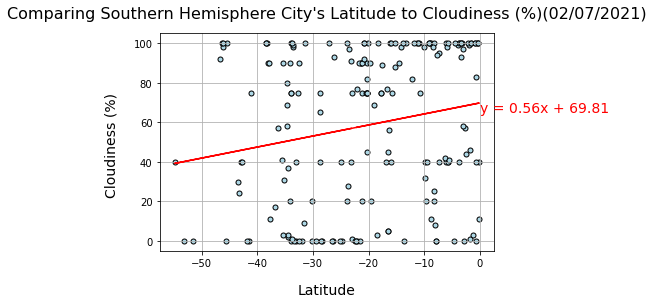

In [77]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶


#x and y values 
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness (%)"]

#linear regression formula/equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values,y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#labeling and formatting
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Cloudiness (%) ", labelpad=15, fontsize=14)
plt.title("Comparing Southern Hemisphere City's Latitude to Cloudiness (%)(02/07/2021)", pad=15, fontsize=16)
plt.grid()

#plot linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 65),fontsize=14,color="red")
plt.show

#save figure
plt.savefig("Images/south_hem_lat_cloudiness_lin_regress_scatter_plot.png")

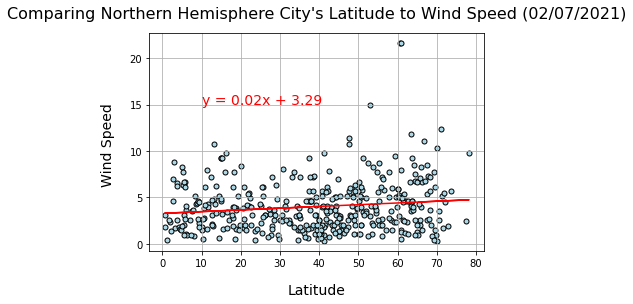

In [93]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#x and y values 
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]

#linear regression formula/equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values,y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#labeling and formatting
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Wind Speed ", labelpad=15, fontsize=14)
plt.title("Comparing Northern Hemisphere City's Latitude to Wind Speed (02/07/2021)", pad=15, fontsize=16)
plt.grid()

#plot linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=14,color="red")
plt.show

#save figure
plt.savefig("Images/north_hem_lat_wind_speed_lin_regress_scatter_plot.png")


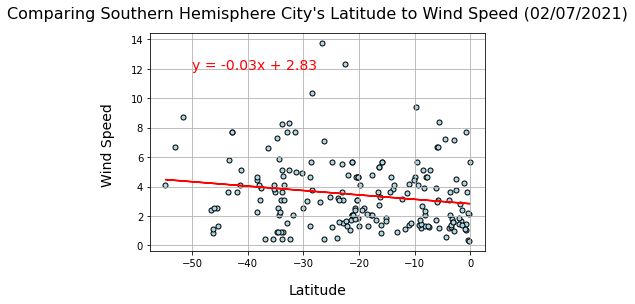

In [95]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#x and y values 
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]

#linear regression formula/equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter 
plt.scatter(x_values,y_values, marker="o", facecolors="lightblue", edgecolors="black", s=25)

#labeling and formatting
plt.xlabel("Latitude", labelpad=15, fontsize=14)
plt.ylabel("Wind Speed ", labelpad=15, fontsize=14)
plt.title("Comparing Southern Hemisphere City's Latitude to Wind Speed (02/07/2021)", pad=15, fontsize=16)
plt.grid()

#plot linear regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 12),fontsize=14,color="red")
plt.show

#save figure
plt.savefig("Images/south_hem_lat_wind_speed_lin_regress_scatter_plot.png")